In [1]:
import numpy as np 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [5]:
#XOR
X = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [6]:
model = MLPClassifier(
    hidden_layer_sizes=(3),
    activation='logistic',
    learning_rate_init=1,
    learning_rate='constant',
    max_iter=100000,
    batch_size='auto',
    tol=1e-6,
    verbose=True,
    #random_state=42,
    solver='sgd',
    n_iter_no_change=1000
).fit(X,y.reshape(len(y)))

Iteration 1, loss = 0.69454801
Iteration 2, loss = 0.69445520
Iteration 3, loss = 0.69438914
Iteration 4, loss = 0.69432189
Iteration 5, loss = 0.69423826
Iteration 6, loss = 0.69414482
Iteration 7, loss = 0.69405141
Iteration 8, loss = 0.69396141
Iteration 9, loss = 0.69387452
Iteration 10, loss = 0.69379098
Iteration 11, loss = 0.69371206
Iteration 12, loss = 0.69363887
Iteration 13, loss = 0.69357179
Iteration 14, loss = 0.69351073
Iteration 15, loss = 0.69345547
Iteration 16, loss = 0.69340578
Iteration 17, loss = 0.69336129
Iteration 18, loss = 0.69332157
Iteration 19, loss = 0.69328613
Iteration 20, loss = 0.69325449
Iteration 21, loss = 0.69322616
Iteration 22, loss = 0.69320067
Iteration 23, loss = 0.69317757
Iteration 24, loss = 0.69315643
Iteration 25, loss = 0.69313685
Iteration 26, loss = 0.69311845
Iteration 27, loss = 0.69310087
Iteration 28, loss = 0.69308379
Iteration 29, loss = 0.69306689
Iteration 30, loss = 0.69304988
Iteration 31, loss = 0.69303245
Iteration 32, los

In [7]:
model.predict(X)

array([0, 1, 1, 0])

# Deep Network with Logistic Sigmoid activation

With activation function:

$\sigma(x)=\frac{1}{1+e^{(-x)}}$

Which is differentiable as:

$\sigma '(x)= \sigma(x) * (1 - \sigma(x))$

XOR data defined as:

$$
X = \begin{vmatrix}
    0 & 0 \\
    1 & 0 \\
    0 & 1 \\
    1 & 1 
    \end{vmatrix}  
$$
$$
y = \begin{vmatrix}
    0\\
    1\\
    1\\
    0
    \end{vmatrix}
$$

A network with one hidden layers, of dimension 2 and having bias is defined as:

$Z_1 = {X}\cdot{W_1}+{B_1} $  
$H = \sigma( Z_1 )$  
$Z_2 = {H}\cdot{W_2}+{B_2} $  
$\hat{y} = \sigma( Z_2 )$  

With weight matrices $W_1$ and $W_2$ randomly initialized with dimensions:

$dims(W_1) = 2*2$  
$dims(W_2) = 2*1$  

And bias vectors $B_1$ and $B_2$ randomly initialized with dimensions:

$dims(B_1) = 1*2$  
$dims(B_2) = 1*1$  

Solving the network using back propogation, having cost defined as:  

$C = .5*(\hat{y} - y)^{2}$  

Yields the gradient respecting the output layer activation:

$\delta _y = \frac{\delta C}{\delta H} = (\hat{y} - y) * \sigma '({H}\cdot{W_2}+{B_2})$  

Gradients respecting the output layer weights and bias:

$\frac{\delta C}{\delta W_2} = H^T \cdot \delta _y $

$\frac{\delta C}{\delta B_2} = \delta _y $

The gradient respecting the hidden layer activation:

$\delta _H = \frac{\delta C}{\delta H} =  (\hat{y} - y) * \sigma '({H}\cdot{W_2}+{B_2}) \cdot W_2^T \cdot \sigma '( Z_1 ) = \delta _y \cdot W_2^T \cdot \sigma '( Z_1 )$

And the gradients respecting the hidden layer weights and biases:

$\frac{\delta C}{\delta W_1} = X^T \cdot \delta _H $

$\frac{\delta C}{\delta B_1} = \delta _H $


In [39]:

def sigmoid(x):
	return 1/np.float64(1+np.exp(-x))

def createweights(s):
	layers=len(s)
	layer=0
	weights=[]
	while layer<layers-1:
		w=np.random.normal(0,.05,(s[layer],s[layer+1]))
		weights.append(w)
		layer=layer+1
	return weights
	
def createbias(s):
	layers=len(s)
	layer=0
	bias=[]
	while layer<layers-1:
		w=np.random.normal(0,.05,(s[layer+1]))
		bias.append(w)
		layer=layer+1
	return bias
	
def predict(train,weights,bias,s):
	layers=len(s)
	layer=0
	predict_on=[train]
	while layer<layers-1:
		pred=sigmoid(predict_on[layer]@weights[layer]+bias[layer])
		predict_on.append(pred)
		layer=layer+1
	return predict_on

def backprop(predict_on,y, weights,bias, s,lr=.01):

	layers=len(s)
	layer=layers-1
	d_out=predict_on[layer]-y

	weights_new = weights
	bias_new = bias

	while layer>0:

		input_values=predict_on[layer-1]
		output_values=predict_on[layer]

		d_out = (d_out * (output_values) * (1 - output_values))

		grad_weights = input_values.T@d_out 
		grad_bias = d_out

		weights_new[layer-1]=weights[layer-1]-lr*grad_weights.reshape(weights[layer-1].shape)
		bias_new[layer-1]=bias[layer-1]-lr*np.sum(grad_bias,axis=0)

		d_out = d_out@weights[layer-1].T

		layer -= 1

	return weights_new,bias_new


In [40]:
aa = np.array([[1],[2],[3]])

aa@[[1]]

array([[1],
       [2],
       [3]])

2.0000001196399553
2.000000164064927
2.000000193299706
2.0000002120847977
2.00000022393139
2.000000231293238
2.000000235807585
2.0000002385343514
2.000000240146871
2.000000241067922
2.0000002415610614
2.0000002417898592
2.000000241855558
2.0000002418207123
2.0000002417239378
2.0000002415890523
2.000000241430745
2.0000002412580695
2.000000241076608
2.0000002408897988
2.0000002406997623
2.000000240507805
2.0000002403147312
2.000000240121038
2.0000002399270302
2.000000239732896
2.0000002395387515
2.000000239344668
2.00000023915069
2.000000238956843
2.000000238763145
2.0000002385696054
2.0000002383762303
2.0000002381830235
2.0000002379899873
2.000000237797123
2.0000002376044317
2.000000237411913
2.0000002372195667
2.000000237027394
2.000000236835394
2.000000236643567
2.000000236451913
2.000000236260431
2.0000002360691216
2.0000002358779847
2.0000002356870192
2.0000002354962256
2.000000235305603
2.0000002351151522
2.0000002349248724
2.0000002347347636
2.0000002345448253
2.0000002343550576
2

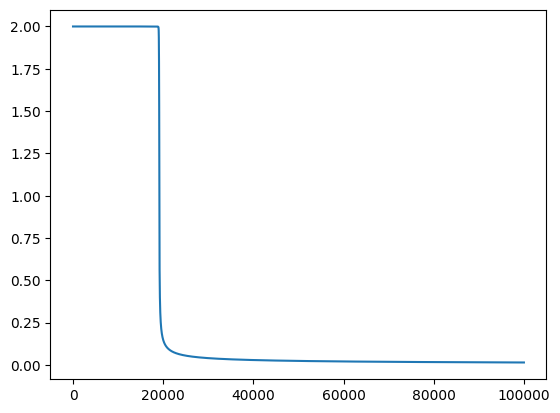

In [48]:

	
s=[2,2,1]
weights=createweights(s=s)
bias=createbias(s=s)		

w11 = []
w12 = []
w21 = []
w22 = []
w31 = []
w32 = []

b11 = []
b12 = []

b21 = []

errs = []
for i in range(100000):
    predict_on=predict(X,weights, bias,s=s)
    errs.append(np.sum(abs(predict_on[-1]-y)))
    
    w11.append(weights[0][0][0])
    w12.append(weights[0][0][1])
    w21.append(weights[0][1][0])
    w22.append(weights[0][1][1])
    w31.append(weights[1][0][0])
    w32.append(weights[1][1][0])

    b11.append(bias[0][0])
    b12.append(bias[0][1])
    b21.append(bias[1][0])

    print(np.sum(abs(predict_on[-1]-y)))
    weights,bias=backprop(predict_on,y, weights, bias, s=s,lr=1)


plt.plot(errs)


In [49]:
weights

[array([[-13.77433418, -14.85419962],
        [-13.77433418, -14.8541996 ]]),
 array([[ 11.12120487],
        [-11.32466785]])]

In [14]:
bias

[array([-19.31814751,  -6.75087708]), array([-5.11574043])]

In [ ]:

fr = 24000
to = 25000


c1 = 'blue'
c2 = 'red'
fig,ax1 = plt.subplots()
ax1.plot(errs[fr:to],color=c1,label='error')
plt.yticks(color=c1)
plt.ylabel('Error',color=c1)
ax2 = ax1.twinx()
ax2.plot(w22[fr:to],color=c2,label='param')
plt.yticks(color=c2)
plt.ylabel('Param Value',color=c2)
plt.show()


In [ ]:

fr = 0
to = -1


c1 = 'blue'
c2 = 'red'

fig,axs = plt.subplots(10,sharex=True,figsize=(8,14))

axs[0].plot(errs[fr:to],color=c1,label='error')
axs[1].plot(w11[fr:to],color=c1,label='error')
axs[2].plot(w12[fr:to],color=c1,label='error')
axs[3].plot(w21[fr:to],color=c1,label='error')
axs[4].plot(w22[fr:to],color=c1,label='error')
axs[5].plot(w31[fr:to],color=c1,label='error')
axs[6].plot(w32[fr:to],color=c1,label='error')
axs[7].plot(b11[fr:to],color=c1,label='error')
axs[8].plot(b12[fr:to],color=c1,label='error')
axs[9].plot(b21[fr:to],color=c1,label='error')